Try to use image processing algorithm to get the better estimation of xy to click

In [1]:
from math import sqrt
from skimage import io
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


In [2]:
image_org=io.imread("index.png")

In [3]:
image_gray = rgb2gray(image_org)

In [4]:
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square,erosion,watershed
from skimage.color import label2rgb
import matplotlib.patches as mpatches

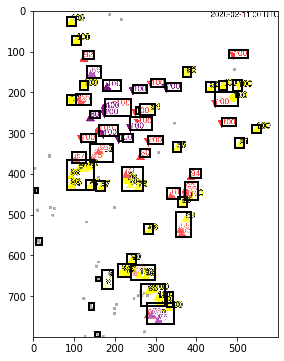

In [10]:
image=image_gray
thresh = threshold_otsu(image)
bw = closing(image > thresh , square(1))


# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
#ax.imshow(image_label_overlay)
ax.imshow(image_org)
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        #print(region.bbox)
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='black', linewidth=2)
        ax.add_patch(rect)

#ax.set_axis_off()
#plt.tight_layout()
plt.show()